https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/

In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from datetime import date as Date


In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('data.csv')
df1=df.reset_index()['evi']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [5]:
print(train_size)
print(test_size)

164
19


In [6]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 7
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(ytest.shape)


(156, 7)
(156,)
(11, 7)
(11,)


In [9]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [10]:
print(X_train.shape)
print(X_test.shape)

(156, 7, 1)
(11, 7, 1)


In [11]:
# 8. Define Simple RNN Model

model = Sequential()
model.add(SimpleRNN(800, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [12]:
# from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=300, restore_best_weights=True)

# model.fit(X_train, y_train,  validation_data=(X_test,ytest), epochs=3000, batch_size=256, verbose=10, callbacks=[early_stopping])


In [13]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=1200,batch_size=256,verbose=1)

Epoch 1/1200
1/1 [==============================] - 2s 2s/step - loss: 0.2982 - val_loss: 8.9017
Epoch 2/1200
1/1 [==============================] - 0s 128ms/step - loss: 9.9279 - val_loss: 0.0910
Epoch 3/1200
1/1 [==============================] - 0s 126ms/step - loss: 0.1511 - val_loss: 0.2363
Epoch 4/1200
1/1 [==============================] - 0s 119ms/step - loss: 0.1999 - val_loss: 0.4007
Epoch 5/1200
1/1 [==============================] - 0s 119ms/step - loss: 0.3515 - val_loss: 0.3361
Epoch 6/1200
1/1 [==============================] - 0s 123ms/step - loss: 0.2863 - val_loss: 0.2003
Epoch 7/1200
1/1 [==============================] - 0s 127ms/step - loss: 0.1595 - val_loss: 0.0792
Epoch 8/1200
1/1 [==============================] - 0s 127ms/step - loss: 0.0575 - val_loss: 0.0166
Epoch 9/1200
1/1 [==============================] - 0s 124ms/step - loss: 0.0229 - val_loss: 0.0209
Epoch 10/1200
1/1 [==============================] - 0s 128ms/step - loss: 0.0571 - val_loss: 0.0426
Ep

In [14]:
X_test.shape

(11, 7, 1)

In [15]:
# 10. Dự báo dữ liệu test,
train_predict=model.predict(X_train)
y_pred=model.predict(test_data.reshape(test_data.shape[0],test_data.shape[1] , 1))


1/1 [==============================] - 0s 133ms/step


In [16]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [17]:
ytest=scaler.inverse_transform(test_data)
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(ytest - y_pred)/np.abs(ytest))*100

print('Testing MAPE:', test_mape)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

Testing RMSE: 0.019509556033986266
Testing MAPE: 4.2310051712824785
Testing MAE: 0.019119526572671984


In [18]:
x_input=test_data[0:].reshape(1,-1)
x_input.shape

(1, 19)

In [19]:
# 13. Dự báo 10 ngày tiếp theo
x_input=test_data[0:].reshape(1,-1)
print(x_input.shape)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=19
i=0
while(i<10):

    if(len(temp_input)>19):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


(1, 19)
[0.36399055]
20
1 day input [0.71540054 0.73053315 0.4774483  0.46431196 0.72188454 0.68857751
 0.74682071 0.62243718 0.66714599 0.57858875 0.58928701 0.81002374
 0.81500835 0.89610319 0.94386025 0.88118952 0.59230357 0.41830451
 0.36399055]
1 day output [[0.26097357]]
2 day input [0.73053315 0.4774483  0.46431196 0.72188454 0.68857751 0.74682071
 0.62243718 0.66714599 0.57858875 0.58928701 0.81002374 0.81500835
 0.89610319 0.94386025 0.88118952 0.59230357 0.41830451 0.36399055
 0.26097357]
2 day output [[0.29339516]]
3 day input [0.4774483  0.46431196 0.72188454 0.68857751 0.74682071 0.62243718
 0.66714599 0.57858875 0.58928701 0.81002374 0.81500835 0.89610319
 0.94386025 0.88118952 0.59230357 0.41830451 0.36399055 0.26097357
 0.29339516]
3 day output [[0.32223865]]
4 day input [0.46431196 0.72188454 0.68857751 0.74682071 0.62243718 0.66714599
 0.57858875 0.58928701 0.81002374 0.81500835 0.89610319 0.94386025
 0.88118952 0.59230357 0.41830451 0.36399055 0.26097357 0.29339516
 

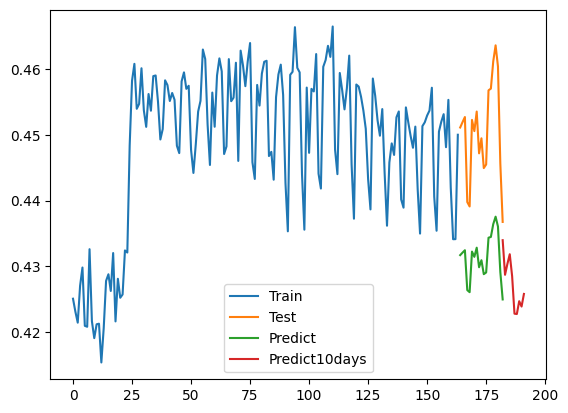

In [20]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,y_pred)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+9, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict10days'])
plt.show()

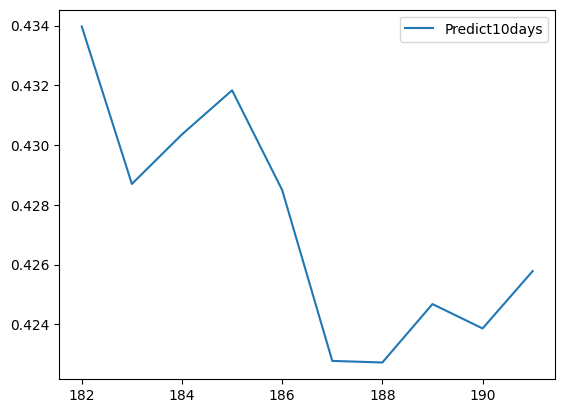

In [21]:
# 14.Vẽ hình
# Dự đoán 10 ngày tiếp theo
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+9, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Predict10days'])
plt.show()

In [22]:
print(scaler.inverse_transform(lst_output))

[[0.43396977]
 [0.4286966 ]
 [0.43035618]
 [0.4318326 ]
 [0.42849317]
 [0.42277209]
 [0.42271972]
 [0.42467487]
 [0.42385941]
 [0.42578003]]
